## Importing libraries and data

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
%matplotlib inline

In [60]:
path = r'C:\Users\sdaon\Documents\Global Air Pollution Dataset'

In [61]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'global air pollution dataset_cleaned.csv'), index_col = False)

## cleaning data

In [62]:
df.columns

Index(['Unnamed: 0', 'Country', 'City', 'AQI Value', 'AQI Category',
       'CO AQI Value', 'CO AQI Category', 'Ozone AQI Value',
       'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category',
       'PM2.5 AQI Value', 'PM2.5 AQI Category'],
      dtype='object')

In [63]:
df.head()

,Unnamed: 0,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [64]:
#remove unamed columns
df = df.drop(columns = ['Unnamed: 0'])

In [65]:
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

In [66]:
df.isnull().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

In [67]:
dups = df.duplicated()

In [68]:
dups.shape # No dups

(23035,)

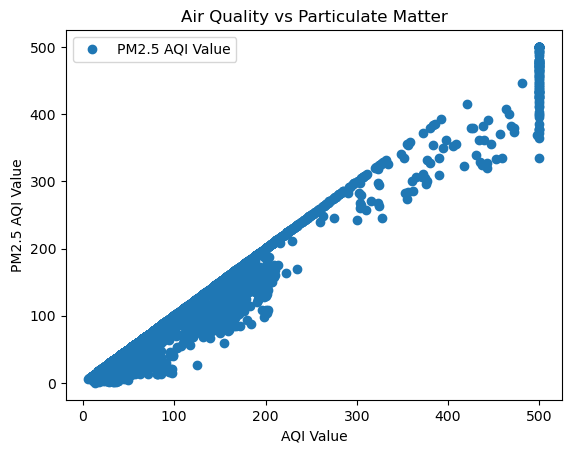

In [69]:
df.plot(x = 'AQI Value', y='PM2.5 AQI Value',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Air Quality vs Particulate Matter')  
plt.xlabel('AQI Value')  
plt.ylabel('PM2.5 AQI Value')  
plt.show()

### hypothesis: High PM2.5 causes high air pollution.

In [70]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['PM2.5 AQI Value'].values.reshape(-1,1)
y = df['AQI Value'].values.reshape(-1,1)

In [71]:
X

array([[51],
       [41],
       [66],
       ...,
       [50],
       [71],
       [70]], dtype=int64)

In [72]:
y

array([[51],
       [41],
       [66],
       ...,
       [50],
       [71],
       [70]], dtype=int64)

In [73]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [74]:
X_train.shape, X_test.shape

((16124, 1), (6911, 1))

In [75]:
y_train.shape, y_test.shape

((16124, 1), (6911, 1))

## 4. Regression analysis

In [76]:
# Create a regression object.

regression = LinearRegression()

In [77]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [78]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

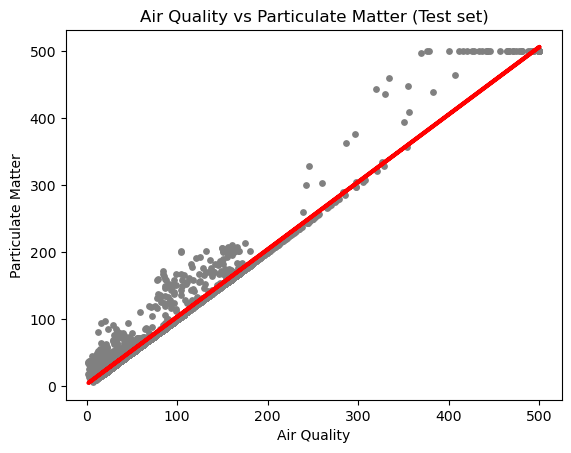

In [79]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Air Quality vs Particulate Matter (Test set)')
plot_test.xlabel('Air Quality')
plot_test.ylabel('Particulate Matter')
plot_test.show()


In [80]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [81]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.00557113]]
Mean squared error:  104.08580315340562
R2 score:  0.9697700599711135


In [82]:
y_predicted

array([[ 38.20900775],
       [ 22.1198696 ],
       [ 33.18115208],
       ...,
       [112.62127169],
       [ 79.43742426],
       [ 22.1198696 ]])

In [83]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,35,38.209008
1,19,22.119870
2,37,33.181152
3,49,52.287004
4,93,96.532134
5,49,52.287004
6,29,13.069729
7,24,14.075301
8,89,92.509849
9,500,469.599024


In [84]:
# Predict the values of X using y.

X_predicted = regression.predict(y_test)

In [85]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(X_test, X_predicted) # This is the mean squared error
r2 = r2_score(X_test, X_predicted) # This is the R2 score. 

In [86]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.00557113]]
Mean squared error:  155.53743758947576
R2 score:  0.9522441202283021


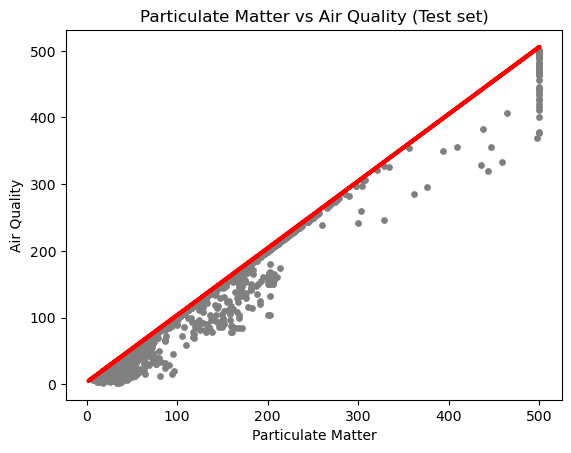

In [87]:
plot_test.ylabel('Particulate Matter')
plot_test = plt
plot_test.scatter(y_test, X_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Particulate Matter vs Air Quality (Test set)')
plot_test.xlabel('Particulate Matter')
plot_test.ylabel('Air Quality')
plot_test.show()

### I can see that our model accuracy score is 0.952  That means Logistic Regression model is performing very good.

### The regression test worked very well to predict the AQI value. The R2 score ise  0.952, and the MSE is 155.53. I checked the data in the dataframe and compared. As the collaration between AQI and PM2.5 is strong (0.98), the plot shows that very well. I don't see any possible bias.